In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import pandas as pd
import os
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d1=pd.read_excel('Weekly_data.xlsx')

In [3]:
d1.head()

,Date,Week No,Month No,Year,Purchase,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,2018-12-31,1,1,2019,37.0,4.51,1.6,187.901424,1.700000,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2019-01-07,2,1,2019,50.0,4.51,1.6,187.901424,2.160000,4.0,2.4,101.008462,101.0012,348680.142857,16027.8
2,2019-01-14,3,1,2019,67.0,4.51,1.6,187.901424,2.195714,4.0,2.4,101.008462,101.0012,322446.857143,16027.8
3,2019-01-21,4,1,2019,55.0,4.51,1.6,187.901424,1.747143,4.0,2.4,101.008462,101.0012,264000.714286,16027.8
4,2019-01-28,5,2,2019,72.0,4.51,1.5,188.841570,2.168571,3.8,2.4,101.065220,101.0591,251632.285714,16073.8


In [4]:
d1.tail()

,Date,Week No,Month No,Year,Purchase,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
191,2022-08-29,35,8,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
192,2022-09-05,36,9,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
193,2022-09-12,37,9,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
194,2022-09-19,38,9,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
195,2022-09-26,39,9,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        196 non-null    datetime64[ns]
 1   Week No                     196 non-null    int64         
 2   Month No                    196 non-null    int64         
 3   Year                        196 non-null    int64         
 4   Purchase                    187 non-null    float64       
 5   Mortgage Rate               196 non-null    float64       
 6   Inflation                   196 non-null    float64       
 7   Housing Price Index         196 non-null    float64       
 8   Treasury Yield              196 non-null    float64       
 9   Unemployment Rate           196 non-null    float64       
 10  GDP                         196 non-null    float64       
 11  Business Confidence Index   196 non-null    float64       

In [6]:
d1.shape

(196, 15)

In [7]:
d1.dtypes

Date                          datetime64[ns]
Week No                                int64
Month No                               int64
Year                                   int64
Purchase                             float64
Mortgage Rate                        float64
Inflation                            float64
Housing Price Index                  float64
Treasury Yield                       float64
Unemployment Rate                    float64
GDP                                  float64
Business Confidence Index            float64
Consumer Confidence Index            float64
Initial Unemployment Claim           float64
Disposable Income                    float64
dtype: object

In [8]:
#d1['Time']=pd.to_datetime(d1['Time'])

In [9]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
Week No,196.0,25.341837,14.704979,1.000000,13.000000,25.000000,37.000000,5.300000e+01
Month No,196.0,6.260204,3.363248,1.000000,3.000000,6.000000,9.000000,1.200000e+01
Year,196.0,2020.403061,1.084053,2019.000000,2019.000000,2020.000000,2021.000000,2.022000e+03
Purchase,187.0,148.085561,166.392117,37.000000,85.500000,105.000000,139.000000,1.058000e+03
Mortgage Rate,196.0,3.616512,0.815452,2.650000,2.980000,3.450000,4.007500,5.810000e+00
Inflation,196.0,3.793367,2.949821,0.100000,1.500000,2.100000,6.200000,9.100000e+00
Housing Price Index,196.0,225.671513,30.771307,187.901424,195.660059,216.351745,252.138644,2.826939e+02
Treasury Yield,196.0,1.588819,0.505500,0.758571,1.153929,1.530000,1.866786,3.012000e+00
Unemployment Rate,196.0,5.313265,2.628040,3.500000,3.600000,4.000000,6.000000,1.470000e+01
GDP,196.0,2.546429,12.237166,-31.200000,1.900000,2.500000,6.300000,3.380000e+01


In [10]:
d1.corr()

,Week No,Month No,Year,Purchase,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
Week No,1.000000,0.996013,-0.125143,0.002079,-0.160334,0.021215,0.064587,-0.256857,0.005907,0.247300,-0.102347,-0.342595,-0.098146,-0.071128
Month No,0.996013,1.000000,-0.120339,0.002964,-0.164237,0.031293,0.073767,-0.252377,-0.003874,0.252448,-0.103695,-0.343919,-0.106067,-0.064760
Year,-0.125143,-0.120339,1.000000,0.392187,0.190500,0.842936,0.950406,0.334177,-0.074608,0.019187,-0.885019,0.403056,-0.091049,0.759452
Purchase,0.002079,0.002964,0.392187,1.000000,0.592774,0.495777,0.448838,0.370564,-0.163584,-0.039906,-0.428855,0.213638,-0.099411,0.194179
Mortgage Rate,-0.160334,-0.164237,0.190500,0.592774,1.000000,0.490071,0.287494,0.789341,-0.440933,-0.116036,-0.224813,0.581494,-0.254045,-0.108988
Inflation,0.021215,0.031293,0.842936,0.495777,0.490071,1.000000,0.937006,0.606853,-0.465137,0.067358,-0.743170,0.551256,-0.398860,0.464268
Housing Price Index,0.064587,0.073767,0.950406,0.448838,0.287494,0.937006,1.000000,0.437291,-0.222089,0.082698,-0.888370,0.429481,-0.230664,0.666582
Treasury Yield,-0.256857,-0.252377,0.334177,0.370564,0.789341,0.606853,0.437291,1.000000,-0.609909,-0.002307,-0.230718,0.712004,-0.475069,0.015846
Unemployment Rate,0.005907,-0.003874,-0.074608,-0.163584,-0.440933,-0.465137,-0.222089,-0.609909,1.000000,-0.265347,-0.127367,-0.442816,0.841326,0.310989
GDP,0.247300,0.252448,0.019187,-0.039906,-0.116036,0.067358,0.082698,-0.002307,-0.265347,1.000000,-0.023461,-0.092212,-0.421846,-0.034983


In [11]:
d1.isnull().sum()

Date                          0
Week No                       0
Month No                      0
Year                          0
Purchase                      9
Mortgage Rate                 0
Inflation                     0
Housing Price Index           0
Treasury Yield                0
Unemployment Rate             0
GDP                           0
Business Confidence Index     0
Consumer Confidence Index     0
Initial Unemployment Claim    0
Disposable Income             0
dtype: int64

In [12]:
future_data  = d1[d1['Purchase'].isna()]

In [13]:
future_data.head(2)

,Date,Week No,Month No,Year,Purchase,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
187,2022-08-01,31,8,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
188,2022-08-08,32,8,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [14]:
base_data = d1[~d1['Purchase'].isna()]

In [15]:
base_data.head(2)

,Date,Week No,Month No,Year,Purchase,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,2018-12-31,1,1,2019,37.0,4.51,1.6,187.901424,1.70,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2019-01-07,2,1,2019,50.0,4.51,1.6,187.901424,2.16,4.0,2.4,101.008462,101.0012,348680.142857,16027.8


In [16]:
base_data.tail(2)

,Date,Week No,Month No,Year,Purchase,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
185,2022-07-18,29,7,2022,805.0,5.380909,9.1,274.253358,2.414167,3.6,2.5,96.600531,105.138462,212281.7500,18423.057143
186,2022-07-25,30,7,2022,891.0,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [17]:
base_data.isna().sum()

Date                          0
Week No                       0
Month No                      0
Year                          0
Purchase                      0
Mortgage Rate                 0
Inflation                     0
Housing Price Index           0
Treasury Yield                0
Unemployment Rate             0
GDP                           0
Business Confidence Index     0
Consumer Confidence Index     0
Initial Unemployment Claim    0
Disposable Income             0
dtype: int64

In [18]:
base_data=base_data.drop('Date',axis=1)

In [19]:
x=base_data.drop('Purchase',axis=1)
y=base_data['Purchase']

In [20]:
x.head(2)

,Week No,Month No,Year,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,1,1,2019,4.51,1.6,187.901424,1.70,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2,1,2019,4.51,1.6,187.901424,2.16,4.0,2.4,101.008462,101.0012,348680.142857,16027.8


In [21]:
y.head(2)

0    37.0
1    50.0
Name: Purchase, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=24)

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(168, 13) (19, 13) (168,) (19,)


In [24]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,y_train)
ln.predict(X_test)

array([111.20470407, 113.86336858, 144.52597473, 110.91871367,
       -14.86262162, 188.50274106,  79.36268154,  72.19895829,
       148.32706267, 530.78015044, 112.82633487,  94.29647034,
       308.15551514, 313.93053213, 529.91228042, 151.5144736 ,
        42.60900224, 124.08221225, 530.93928252])

In [25]:
abs(y_test.values-ln.predict(X_test)).sum()

1757.7242669522238

In [26]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(X_train,y_train)
ls.predict(X_test)

abs(y_test.values-ls.predict(X_test)).sum()

C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.097e+02, tolerance: 3.847e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


1791.521741069766

In [27]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(X_train,y_train)
rd.predict(X_test)

abs(y_test.values-rd.predict(X_test)).sum()

1794.1416325934406

In [28]:
def table_validation():
    validation_table=[]
    for i in [LinearRegression,Lasso,Ridge]:
        rd=i()
        rd.fit(X_train,y_train)
        rd.predict(X_test)
        mae=mean_absolute_error(y_test.values,rd.predict(X_test))
        mse=mean_squared_error(y_test.values,rd.predict(X_test))
        rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
        mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
        rsquare=r2_score(y_test.values,rd.predict(X_test))
        validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #print(type(validation_table))
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [29]:
tv=table_validation()

C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.097e+02, tolerance: 3.847e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [30]:
tv

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,92.511804,17752.806055,133.239656,63.752673,0.719402
1,<class 'sklearn.linear_model._coordinate_desce...,94.290618,19090.099426,138.166926,63.772382,0.698265
2,<class 'sklearn.linear_model._ridge.Ridge'>,94.428507,18860.788750,137.334587,63.925698,0.701889


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [32]:
def model_validation(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
    for i in models:
        rd=i()
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [33]:
pd.options.display.float_format='{:0.2f}'.format

In [34]:
validation_table_train = model_validation('train',X_train,X_test,y_train,y_test)

C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.097e+02, tolerance: 3.847e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [35]:
validation_table_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,45.91,9622.32,98.09,35.43,0.58
1,<class 'sklearn.linear_model._coordinate_desce...,45.58,9768.28,98.83,34.20,0.57
2,<class 'sklearn.linear_model._ridge.Ridge'>,45.56,9664.96,98.31,34.51,0.58
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,9.48,820.19,28.64,5.57,0.96
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,8.46,465.57,21.58,6.16,0.98


In [36]:
validation_table_test = model_validation('test',X_train,X_test,y_train,y_test)

C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.097e+02, tolerance: 3.847e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [37]:
validation_table_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,92.51,17752.81,133.24,63.75,0.72
1,<class 'sklearn.linear_model._coordinate_desce...,94.29,19090.10,138.17,63.77,0.70
2,<class 'sklearn.linear_model._ridge.Ridge'>,94.43,18860.79,137.33,63.93,0.70
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,48.68,14963.53,122.33,19.10,0.76
4,<class 'sklearn.ensemble._forest.RandomForestR...,55.30,14503.75,120.43,19.97,0.77
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,65.89,14660.70,121.08,26.24,0.77


## The models are working good on the training data but not working well on the testing data, so we need to do further Processing
##### we need to check multicollinearity, if the features are highly correlated, we need to remove one feature from the highly correlated features
##### By Using Lasso regression model , we can check the features coefficients values, if the coeffis having 0 values, we can remove them from the model building


R squared Error on test set :  0.3382122636806293
                   Column_Name  Coefficient_Value_lr
0                      Week No                 -8.56
1                     Month No                 47.79
2                         Year                112.13
3                Mortgage Rate                228.67
4                    Inflation                -30.05
5          Housing Price Index                  2.28
6               Treasury Yield                -80.64
7            Unemployment Rate                  2.54
8                          GDP                 -0.16
9    Business Confidence Index                 22.12
10   Consumer Confidence Index                -10.64
11  Initial Unemployment Claim                 -0.00
12           Disposable Income                 -0.01


<BarContainer object of 13 artists>

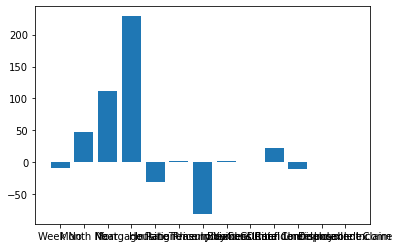

In [38]:
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

# predicting on test
linearreg_prediction = linearreg.predict(X_test)

# calculating R_square
R_squared = r2_score(linearreg_prediction,y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value_lr'] = pd.Series(linearreg.coef_)
print(coefficient_df)
coefficient_df.to_csv('coeff_values.csv',index=False)
plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value_lr"])


In [39]:
import pandas as pd

In [40]:
coefficient_df = pd.DataFrame()

In [41]:
coefficient_df["Column_Name"] = X_train.columns

In [42]:
coefficient_df

,Column_Name
0,Week No
1,Month No
2,Year
3,Mortgage Rate
4,Inflation
5,Housing Price Index
6,Treasury Yield
7,Unemployment Rate
8,GDP
9,Business Confidence Index


In [43]:
coefficient_df['Coefficient_Value'] = pd.Series(linearreg.coef_)
print(coefficient_df)

                   Column_Name  Coefficient_Value
0                      Week No              -8.56
1                     Month No              47.79
2                         Year             112.13
3                Mortgage Rate             228.67
4                    Inflation             -30.05
5          Housing Price Index               2.28
6               Treasury Yield             -80.64
7            Unemployment Rate               2.54
8                          GDP              -0.16
9    Business Confidence Index              22.12
10   Consumer Confidence Index             -10.64
11  Initial Unemployment Claim              -0.00
12           Disposable Income              -0.01


In [44]:
pd.Series(linearreg.coef_)

0     -8.56
1     47.79
2    112.13
3    228.67
4    -30.05
5      2.28
6    -80.64
7      2.54
8     -0.16
9     22.12
10   -10.64
11    -0.00
12    -0.01
dtype: float64

In [45]:
linearreg.intercept_

-228590.8488149408

R squared Error on test set :  0.29525996164607915


<BarContainer object of 13 artists>

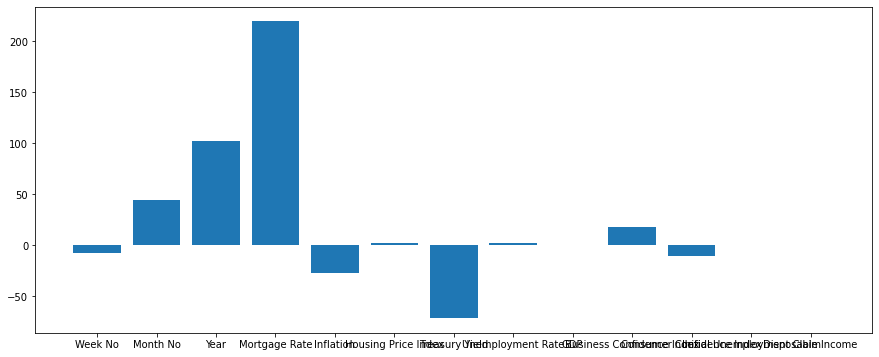

In [46]:
from sklearn.linear_model import Ridge

# Train the model
ridgeRegressor = Ridge(alpha = 0.5) #here setting alpha is nothing but lambda in the formula
ridgeRegressor.fit(X_train, y_train)
y_predicted_ridge = ridgeRegressor.predict(X_test)

# calculating R_square
R_squared = r2_score(y_predicted_ridge,y_test)
print("R squared Error on test set : ", R_squared)

coefficient_df['Coefficient_Value_ridge'] = pd.Series(ridgeRegressor.coef_)
#print(coefficient_df.head)
coefficient_df.to_csv('coeff_values.csv',index=False)
plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value_ridge"])

R squared Error on test set :  0.23571285197060576


C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.097e+02, tolerance: 3.847e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


<BarContainer object of 13 artists>

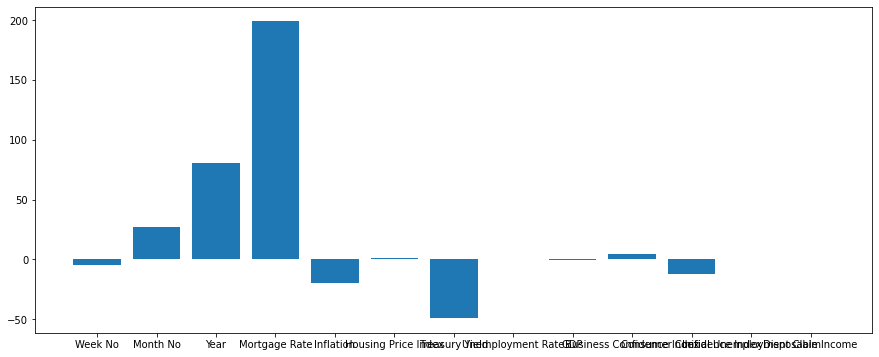

In [47]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lassoRegressor = Lasso(alpha = 1) #here setting alpha is nothing but lambda in the formula
lassoRegressor.fit(X_train, y_train)
y_predicted_lasso = lassoRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_lasso,y_test)
print("R squared Error on test set : ", R_squared)

coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value_lasso'] = pd.Series(lassoRegressor.coef_)
#print(coefficient_df.head)
#coefficient_df.to_csv('coeff_values.csv',index=False)

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value_lasso"])

In [48]:
lasso_coeff_zero=[]

In [49]:
index = len(coefficient_df.Coefficient_Value_lasso)

In [50]:
index

13

In [51]:
i=0
while i<index:
    if coefficient_df.Coefficient_Value_lasso[i]==0:
        value=coefficient_df.Column_Name[i]
        lasso_coeff_zero.append(value)
    i=i+1
lasso_coeff_zero

['Unemployment Rate']

In [52]:
len(lasso_coeff_zero)

1

In [53]:
#Using Pearson Correlation

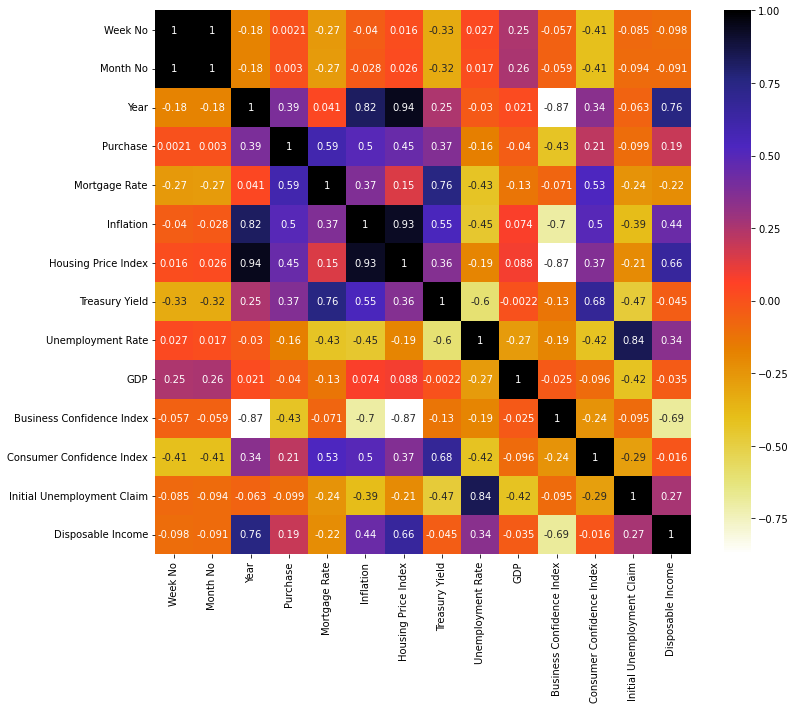

In [54]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = base_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [55]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation_check(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation_check(X_train, 0.8)
len(set(corr_features))

5

In [59]:
corr_features

{'Business Confidence Index',
 'Housing Price Index',
 'Inflation',
 'Initial Unemployment Claim',
 'Month No'}

In [60]:
base_data_upd = base_data.drop(corr_features,axis=1)

In [61]:
base_data.head(2)

,Week No,Month No,Year,Purchase,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,1,1,2019,37.00,4.51,1.60,187.90,1.70,4.00,2.40,101.01,101.00,329495.25,16027.80
1,2,1,2019,50.00,4.51,1.60,187.90,2.16,4.00,2.40,101.01,101.00,348680.14,16027.80


In [62]:
base_data_upd.head(2)

,Week No,Year,Purchase,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,1,2019,37.00,4.51,1.70,4.00,2.40,101.00,16027.80
1,2,2019,50.00,4.51,2.16,4.00,2.40,101.00,16027.80


In [63]:
x=base_data_upd.drop('Purchase',axis=1)
y=base_data_upd['Purchase']

In [64]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=24)

In [65]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(168, 8) (19, 8) (168,) (19,)


In [66]:
validation_table_train_upd = model_validation('train',X_train,X_test,y_train,y_test)

In [67]:
validation_table_train_upd

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,47.95,10085.82,100.43,36.88,0.56
1,<class 'sklearn.linear_model._coordinate_desce...,47.84,10124.68,100.62,36.38,0.56
2,<class 'sklearn.linear_model._ridge.Ridge'>,47.65,10099.47,100.50,36.26,0.56
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,9.63,1066.54,32.66,5.91,0.95
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,10.50,1258.42,35.47,5.69,0.95


In [68]:
validation_table_test_upd = model_validation('test',X_train,X_test,y_train,y_test)

In [69]:
validation_table_test_upd

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,91.91,17441.19,132.07,63.72,0.72
1,<class 'sklearn.linear_model._coordinate_desce...,95.21,18674.90,136.66,64.54,0.70
2,<class 'sklearn.linear_model._ridge.Ridge'>,93.46,18197.65,134.90,63.54,0.71
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,82.00,52438.21,228.99,46.16,0.17
4,<class 'sklearn.ensemble._forest.RandomForestR...,51.62,9212.07,95.98,22.34,0.85
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,53.45,10792.49,103.89,26.95,0.83


In [70]:
from sklearn.preprocessing import StandardScaler
def StandardScaler_of_data(x,X_train,X_test):    
    if x=='train':
        print("runningin in training mode")
        le=StandardScaler()
        le.fit(X_train)
        x=le.transform(X_train)
        dat1=pd.DataFrame(x)
        dat1.columns=X_train.columns
        data=dat1
    else:
        print("running in test mode")
        le=StandardScaler()
        le.fit(X_train)
        x=le.transform(X_test)
        dat1=pd.DataFrame(x)        
        dat1.columns=X_test.columns
        data=dat1
    return data

In [71]:
X_train_std = StandardScaler_of_data('train',X_train,X_test)

runningin in training mode


In [72]:
X_train.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
184,28,2022,5.50,2.20,3.60,2.50,105.14,18423.06
25,26,2019,3.84,1.81,3.60,3.20,101.46,16142.70


In [73]:
X_train_std.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,0.17,1.66,2.87,1.43,-0.69,-0.00,1.58,0.78
1,0.04,-1.25,0.50,0.59,-0.69,0.06,0.28,-1.23


In [74]:
X_train.shape

(168, 8)

In [75]:
X_test_std = StandardScaler_of_data('test',X_train,X_test)

running in test mode


In [76]:
X_test.shape

(19, 8)

In [77]:
X_test.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
53,2,2020,3.72,1.66,3.50,-5.10,101.64,16622.60
69,18,2020,3.33,0.89,14.70,-31.20,98.96,18919.40


In [78]:
X_test_std.head(2) 

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,-1.59,-0.28,0.33,0.26,-0.73,-0.61,0.35,-0.81
1,-0.51,-0.28,-0.23,-1.40,3.49,-2.72,-0.60,1.22


In [79]:
validation_table_train_upd_new = model_validation('train',X_train_std,X_test_std,y_train,y_test)

In [80]:
validation_table_train_upd_new

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,47.95,10085.82,100.43,36.88,0.56
1,<class 'sklearn.linear_model._coordinate_desce...,47.68,10100.43,100.50,36.36,0.56
2,<class 'sklearn.linear_model._ridge.Ridge'>,47.81,10089.00,100.44,36.57,0.56
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,10.46,1405.34,37.49,6.00,0.94
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,11.11,2444.99,49.45,5.75,0.89


In [81]:
validation_table_test_upd_new = model_validation('test',X_train_std,X_test_std,y_train,y_test)

In [82]:
validation_table_test_upd_new

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,91.91,17441.19,132.07,63.72,0.72
1,<class 'sklearn.linear_model._coordinate_desce...,93.60,18222.44,134.99,64.16,0.71
2,<class 'sklearn.linear_model._ridge.Ridge'>,92.51,17793.21,133.39,63.53,0.72
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,83.63,52491.53,229.11,47.66,0.17
4,<class 'sklearn.ensemble._forest.RandomForestR...,51.93,8814.38,93.88,23.17,0.86
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,45.30,8974.34,94.73,17.05,0.86


In [83]:
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [84]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-35037.31931807338


In [85]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.360e+05, tolerance: 4.185e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.656e+05, tolerance: 5.036e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\gn221m\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increa

{'alpha': 5}
-31610.454959048173


In [86]:
model = RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Train Accuracy: 0.9598736785414316
Test Accuracy: 0.8564377056020609


In [87]:
import pickle

In [88]:
# save the model to disk
filename = 'RF_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [89]:
X_train.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
184,28,2022,5.50,2.20,3.60,2.50,105.14,18423.06
25,26,2019,3.84,1.81,3.60,3.20,101.46,16142.70


In [90]:
X_train.columns

Index(['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income'],
      dtype='object')

In [91]:
future_data.head(2)

,Date,Week No,Month No,Year,Purchase,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
187,2022-08-01,31,8,2022,NaN,5.41,9.10,274.25,2.38,3.60,2.50,96.60,105.14,213138.56,18423.06
188,2022-08-08,32,8,2022,NaN,5.41,9.10,274.25,2.38,3.60,2.50,96.60,105.14,213138.56,18423.06


In [92]:
pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]

In [93]:
def predictions_on_future_data(future_data):
    pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]
    filename = 'RF_model.sav'
    rf_model = pickle.load(open(filename, 'rb'))
    y_pred = rf_model.predict(pred_data)
    print(y_pred)
    future_data['Purchase_Pred'] = y_pred
    
    return future_data

In [94]:
preds = predictions_on_future_data(future_data)

[706.04 706.04 706.04 706.04 706.04 706.04 706.04 706.04 706.04]


C:\Users\gn221m\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [95]:
preds.to_excel("predictions_on_future_data.xlsx",index=False)

In [96]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,4,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['mse','mae']
# Create the parameters grid

param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['mse', 'mae'], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6], 'bootstrap': [True, False]}


In [97]:
from sklearn.model_selection import GridSearchCV
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [98]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [102]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 10}

In [104]:
rf_tuned = RandomForestRegressor(n_estimators=10,criterion='mae',max_features='auto', max_depth=70,min_samples_split=4,min_samples_leaf=4,bootstrap=False,n_jobs=-1)

In [105]:
rf_tuned.fit(X_train, y_train)
print("Train Accuracy:",rf_tuned.score(X_train, y_train))
print("Test Accuracy:",rf_tuned.score(X_test, y_test))

Train Accuracy: 0.7438707656352355
Test Accuracy: 0.7509849587099265


In [107]:
rf_tuned.feature_importances_

array([0.07098615, 0.00309461, 0.61031514, 0.01679175, 0.03978354,
       0.03312828, 0.01698637, 0.20891415])

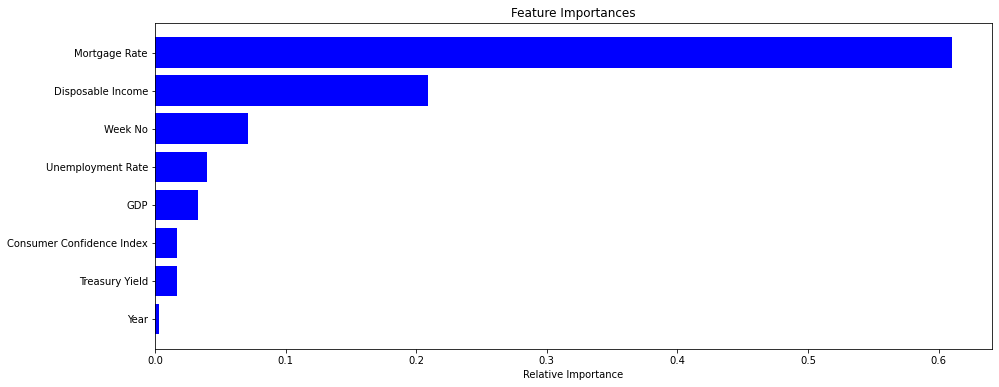

['Week No',
 'Year',
 'Mortgage Rate',
 'Treasury Yield',
 'Unemployment Rate',
 'GDP',
 'Consumer Confidence Index',
 'Disposable Income']

In [108]:
#Feature Importance
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
list(features)

In [100]:
def model_validation_rf(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[RandomForestRegressor]
    for i in models:
        rd=i(n_estimators=10,criterion='mse',max_features='auto', max_depth=40,min_samples_split=6,min_samples_leaf=4,bootstrap=False,n_jobs=-1)
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [101]:
val_table_rf_train = model_validation_rf('train',X_train,X_test,y_train,y_test)

In [102]:
val_table_rf_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,18.08,4440.59,66.64,10.50,0.81


In [103]:
val_table_rf_test = model_validation_rf('test',X_train,X_test,y_train,y_test)

In [104]:
val_table_rf_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,56.20,10851.39,104.17,25.96,0.83


In [105]:
# save the model to disk
filename = 'RF_tuned.sav'
pickle.dump(rf_tuned, open(filename, 'wb'))

In [106]:
def predictions_on_future_data(future_data):
    pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]
    filename = 'RF_tuned.sav'
    rf_model = pickle.load(open(filename, 'rb'))
    y_pred = rf_model.predict(pred_data)
    print(y_pred)
    future_data['Purchase_Pred'] = y_pred
    
    return future_data

In [107]:
preds_tuned = predictions_on_future_data(future_data)

[681. 681. 681. 681. 681. 681. 681. 681. 681.]


C:\Users\gn221m\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Building XGBoost and doing Hyper Parameter Tuning

In [109]:
from xgboost import XGBRegressor

In [112]:
def model_validation_xgboost(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[RandomForestRegressor,XGBRegressor]
    for i in models:
        rd=i()
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [113]:
val_table_xgboost_train = model_validation_xgboost('train',X_train,X_test,y_train,y_test)
val_table_xgboost_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,9.05,836.19,28.92,5.95,0.96
1,<class 'xgboost.sklearn.XGBRegressor'>,0.07,0.01,0.10,0.07,1.00


In [114]:
val_table_xgboost_test = model_validation_xgboost('test',X_train,X_test,y_train,y_test)
val_table_xgboost_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,50.91,9493.08,97.43,27.42,0.85
1,<class 'xgboost.sklearn.XGBRegressor'>,56.30,15210.10,123.33,28.19,0.76


In [119]:
def hyperParameterTuning_xgboost(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01,0.05,0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.3,0.5,0.7],
        'colsample_bytree': [0.3,0.5,0.7],
        'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 90, num = 5)],
        'objective': ['reg:squarederror']
    }
    print(param_tuning)
    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [120]:
hyperParameterTuning_xgboost(X_train, y_train)

{'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7, 10], 'min_child_weight': [1, 3, 5], 'subsample': [0.3, 0.5, 0.7], 'colsample_bytree': [0.3, 0.5, 0.7], 'n_estimators': [10, 30, 50, 70, 90], 'objective': ['reg:squarederror']}
Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 30,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [121]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 10,
        min_child_weight = 1,
        n_estimators = 30,
        subsample = 0.7)

In [122]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test,y_test)], verbose=False)

C:\Users\gn221m\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [123]:
def model_validation_xgboost(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[XGBRegressor]
    for i in models:
        rd=i(objective = 'reg:squarederror',
            colsample_bytree = 0.7,
            learning_rate = 0.1,
            max_depth = 10,
            min_child_weight = 1,
            n_estimators = 30,
            subsample = 0.7)               
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [124]:
val_table_xgboost_train = model_validation_xgboost('train',X_train,X_test,y_train,y_test)
val_table_xgboost_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'xgboost.sklearn.XGBRegressor'>,13.07,1312.36,36.23,7.10,0.94


In [125]:
val_table_xgboost_test = model_validation_xgboost('test',X_train,X_test,y_train,y_test)
val_table_xgboost_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'xgboost.sklearn.XGBRegressor'>,58.03,10627.68,103.09,22.89,0.83
